### Challenge
Problem Statement: The purpose of this analysis is to use various features from skin thickness to history of previous disease to detect whether a patient has Diabetes or not. We would use Decision Tree classifier, logistic regression as well as SVM models for the prediction.

### Preliminary Exploration (EDA)
Exploratory Analysis of data aims to investigate datasets before modelling and prediction to discover patterns and assumptions.

#### Column Descriptors
- 'Pregnancies' is the number of pregnancies to date.

- 'Glucose' is is the plasma glucose concentration over 2 hours in an oral glucose tolerance test, measured in milligrams per decilitre (mg/dL). A blood sugar level less than 140 mg/dL is normal. A reading of more than 200 mg/dL indicates diabetes, whereas that between 140 and 199 mg/dL indicates prediabetes. 

- 'BloodPressure' is the diastolic blood pressure, measured in millimeters of mercury (mm Hg). A normal blood pressure would have a reading of less than 80 mmHg, and this may vary from 90 to 120 mmHg for a healthy young person. A reading of more than 140 mmHg indicates high blood pressure.

- 'SkinThickness' is the triceps skin fold thickness, measured in millimeters (mm). 

- 'Insulin' is the 2-hour serum insulin, measured in micrometre units per millilitre (mu U/ml). 

- 'BMI' is the body mass index (BMI) for weight in kg and height in m (kg/m^2). 

- 'DiabetesPedigreeFunction' is a function that scores likelihood of diabetes based on family history. 

- 'Age' in years has a realistic range of 21 to 81.

- 'Outcome' is the target class label, where 0 represents absence and 1 represents presence of diabetes.


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
import os 
os.chdir ('C:\\Users\\Yahdii\\OneDrive\\Tech4Dev')

In [57]:
pwd

'C:\\Users\\Yahdii\\OneDrive\\Tech4Dev'

In [58]:
#Import necessary libraries for preliminary exploration
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [59]:
#read in the data
df = pd.read_csv('diabetes_data.csv')

In [60]:
#info about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- We have 9 columns namely; Pregnancies,Glucose,Blood PRessure, Skin Thickness, Insulin, BMI, Diabetes Pedigree Function, Age and the target which is Outcome. Of the 9 variables, 7 are integer columns, 2 are float columns. The dataset has a total of 768 observations.
- The dataset contains no null values.

In [61]:
#identify summary statistics of the attributes including measures of central tendency and measures of dispersion.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


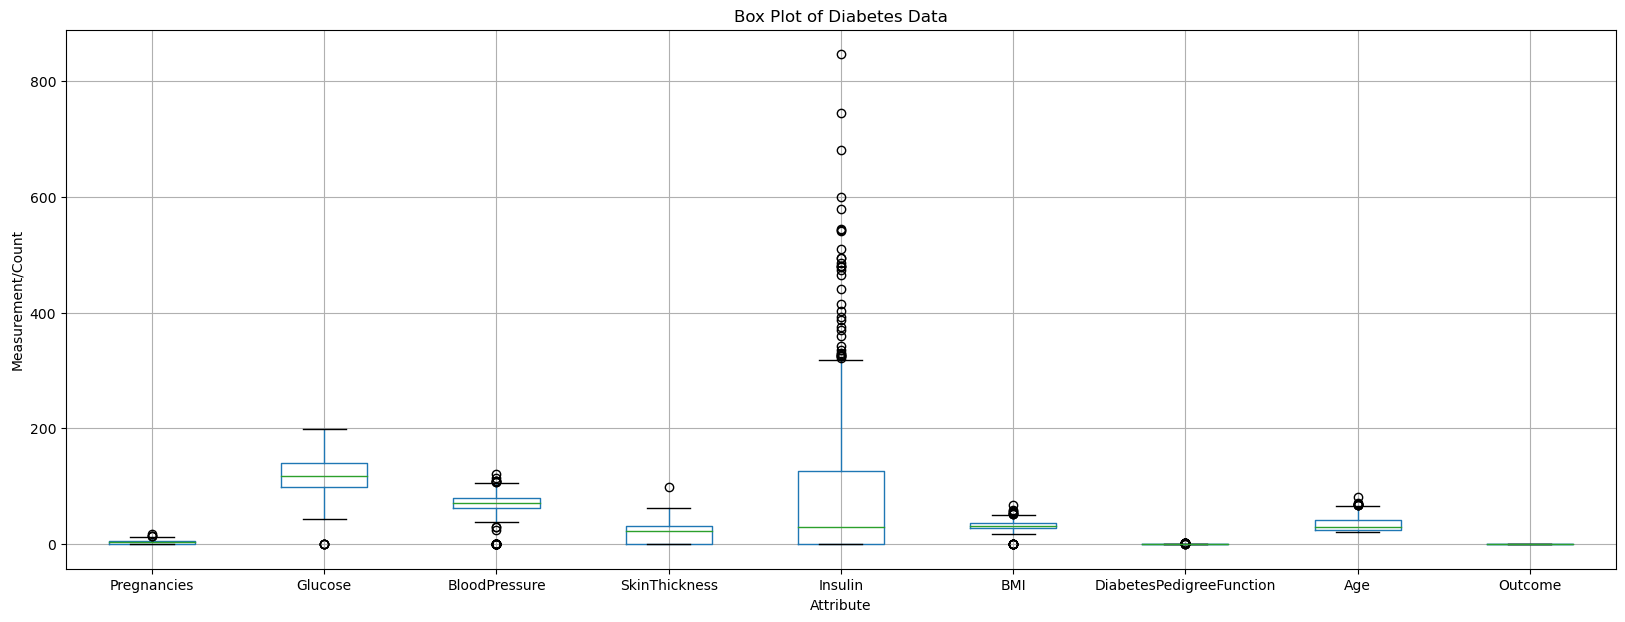

In [62]:
#let's check for outliers in the dataset using a boxplot.
df.boxplot(return_type='axes',figsize=(20,7))
plt.title('Box Plot of Diabetes Data')
plt.xlabel('Attribute')
plt.ylabel('Measurement/Count')
plt.show()

- We are not going to remove the outliers as they could hold vital information for our model.

#Notes on summary statistics;
- On closer inspection, it was discovered that certain columns have 0 values when in reality they shouldn't have 0 values, columns like Glucose which indicates blood sugar level, Blood pressure, Insulin, Skin Thickness and BMI. As such we are going to replace these impossible values with the median of the columns. 

In [63]:
#Replace impossible values with mean of the column
df['Glucose'] = df['Glucose'].replace(0, df.Glucose.median())
df['BloodPressure'] = df['BloodPressure'].replace(0, df.BloodPressure.median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df.SkinThickness.median())
df['Insulin'] = df['Insulin'].replace(0, df.Insulin.median())
df['BMI'] = df['BMI'].replace(0, df.BMI.median())


In [64]:
#check summary statistics again to ensure the impossible values have been removed.
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
#check to see if dataset is balanced
print(len(df[df['Outcome']==0]))
print(len(df[df['Outcome']==1]))
print(f'Non-diabetes outcomes made up {round((500/768)*100,2)} % of the dataset')
print(f'Diabetes outcomes made up {round((268/768)*100,2)} % of the dataset')


500
268
Non-diabetes outcomes made up 65.1 % of the dataset
Diabetes outcomes made up 34.9 % of the dataset


#There is an imbalance in the dataset which we would take note of for later.

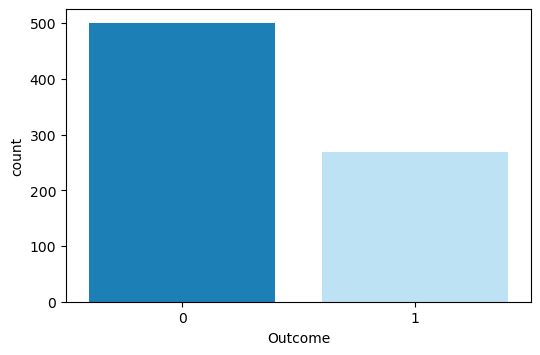

In [66]:
#visualize the above
plt.figure(figsize=(6,3.8))
plot = sns.countplot(df['Outcome'], palette=['#0288D1', '#B3E5FC'])
plot.set_xticklabels(plot.get_xticklabels())
plt.show();

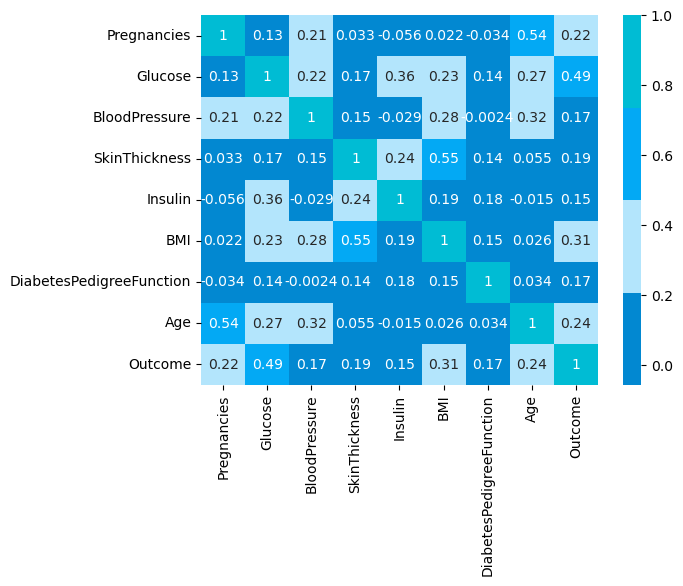

In [67]:
#let's check for multicollinearity in the data
sns.heatmap(df.corr(), cmap = ['#0288D1', '#B3E5FC', '#03A9F4', '#00BCD4'], annot = True)
plt.show()

Based on this correlation plot, the following were observed;
- For every unit(yearly) increase in age there is an increase by 0.54 in number of pregnancies. This correlation does not mean we can substitute one feature for the other as they do not contain the same information.
- For every millimeter increase in skin thickness, there is a 0.55 unit increase in BMI, they are highly correlated. We'd drop skin thickness and use BMI because it is a more standard measure of weight.
- When Glucose and BMI increase by 1 unit, there is a 0.49 and 0.31 unit increase respectively in outcome of Diabetes. 

In [90]:
#dropping the skin thickness feature
df = df.drop('SkinThickness', axis=1)

In [91]:
df

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,30.5,33.6,0.627,50,1
1,1,85,66,30.5,26.6,0.351,31,0
2,8,183,64,30.5,23.3,0.672,32,1
3,1,89,66,94.0,28.1,0.167,21,0
4,0,137,40,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101,76,180.0,32.9,0.171,63,0
764,2,122,70,30.5,36.8,0.340,27,0
765,5,121,72,112.0,26.2,0.245,30,0
766,1,126,60,30.5,30.1,0.349,47,1


- The features would not be scaled because of the kind of information contained in the dataset. Mainly, they are risk factors and should be allowed to maintain their true weight if the model is to be as accurate as possible.

## Modelling and Prediction
For modelling and prediction, we are going to use three algorithms namely;
- Decision tree Regressor
- Logistic Regression
- SVM model
- First we start by splitting the data into training and test sets.

### Split the Data

In [92]:
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [93]:
X

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,30.5,33.6,0.627,50
1,1,85,66,30.5,26.6,0.351,31
2,8,183,64,30.5,23.3,0.672,32
3,1,89,66,94.0,28.1,0.167,21
4,0,137,40,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180.0,32.9,0.171,63
764,2,122,70,30.5,36.8,0.340,27
765,5,121,72,112.0,26.2,0.245,30
766,1,126,60,30.5,30.1,0.349,47


In [94]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

### Decision Tree Classifier

In [96]:
#import the library
from sklearn.tree import DecisionTreeClassifier

#define the model
decision = DecisionTreeClassifier(criterion='gini', max_depth = 2, splitter = 'best', random_state=0) #random_state ensures you get the same model each time, gini is used because it is binary classification
#max depth is how much the nodes should get expanded
#fit the model
decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [97]:
#now we are going to predict the test set using the X_test
y_pred_decision = decision.predict(X_test)

In [98]:
#we are going test the models accuracy using mean squared error because it is suited for outliers
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred_decision))
print('The Mean Absolute Error measures the average difference between predicted values and Actual Values')

0.2077922077922078
The Mean Absolute Error measures the average difference between predicted values and Actual Values


In [99]:
from sklearn.metrics import accuracy_score
print(f'The model accuracy score of the decision tree regressor {accuracy_score(y_test,y_pred_decision)}')

The model accuracy score of the decision tree regressor 0.7922077922077922


In [100]:
print('Training set score: ', decision.score(X_train, y_train))

print('Test set score: ', decision.score(X_test, y_test))

Training set score:  0.7654723127035831
Test set score:  0.7922077922077922


### Logistic Regression

In [101]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs', random_state=0, class_weight='balanced')
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', random_state=0)

In [102]:
#now we are going to predict the test set using the X_test
y_pred_logreg = logreg.predict(X_test)

In [103]:
# probability of getting zero for each data point, i.e , no Diabetes
logreg.predict_proba(X_test)[:,0]

array([0.40624012, 0.56983144, 0.78104018, 0.91950407, 0.66932981,
       0.58014512, 0.48104436, 0.85597279, 0.74251795, 0.6796077 ,
       0.35807192, 0.88720845, 0.00359224, 0.13088211, 0.50901145,
       0.13668266, 0.6358196 , 0.52820731, 0.93800482, 0.77237488,
       0.44224046, 0.77456024, 0.01368376, 0.60209645, 0.89297747,
       0.42467206, 0.6703586 , 0.11737762, 0.86843045, 0.34051723,
       0.39267771, 0.79043998, 0.92199793, 0.16052643, 0.80219811,
       0.17503409, 0.86174206, 0.70914155, 0.83491155, 0.20131662,
       0.66677003, 0.87493706, 0.9435669 , 0.50886225, 0.89594871,
       0.97303175, 0.14749322, 0.08094778, 0.89800125, 0.79347883,
       0.93547977, 0.71056851, 0.06496261, 0.93103002, 0.10148284,
       0.83637411, 0.49389885, 0.56097401, 0.27468666, 0.75488199,
       0.22488913, 0.89677169, 0.16878332, 0.64514263, 0.43876923,
       0.84231812, 0.3615638 , 0.50701888, 0.13549073, 0.21090121,
       0.05057525, 0.11751001, 0.23011996, 0.97825246, 0.15761

In [104]:
#probability of getting 1, i.e , Diabetes
logreg.predict_proba(X_test)[:,1]

array([0.59375988, 0.43016856, 0.21895982, 0.08049593, 0.33067019,
       0.41985488, 0.51895564, 0.14402721, 0.25748205, 0.3203923 ,
       0.64192808, 0.11279155, 0.99640776, 0.86911789, 0.49098855,
       0.86331734, 0.3641804 , 0.47179269, 0.06199518, 0.22762512,
       0.55775954, 0.22543976, 0.98631624, 0.39790355, 0.10702253,
       0.57532794, 0.3296414 , 0.88262238, 0.13156955, 0.65948277,
       0.60732229, 0.20956002, 0.07800207, 0.83947357, 0.19780189,
       0.82496591, 0.13825794, 0.29085845, 0.16508845, 0.79868338,
       0.33322997, 0.12506294, 0.0564331 , 0.49113775, 0.10405129,
       0.02696825, 0.85250678, 0.91905222, 0.10199875, 0.20652117,
       0.06452023, 0.28943149, 0.93503739, 0.06896998, 0.89851716,
       0.16362589, 0.50610115, 0.43902599, 0.72531334, 0.24511801,
       0.77511087, 0.10322831, 0.83121668, 0.35485737, 0.56123077,
       0.15768188, 0.6384362 , 0.49298112, 0.86450927, 0.78909879,
       0.94942475, 0.88248999, 0.76988004, 0.02174754, 0.84238

In [105]:
# model accuracy metrics for logistic regression


print('Training set score: ', logreg.score(X_train, y_train))

print('Test set score: ', logreg.score(X_test, y_test))

Training set score:  0.754071661237785
Test set score:  0.7922077922077922


In [106]:
#check null accuracy 
y_test.value_counts()
null_acuracy = 99/(len(y_test))
null_acuracy #A model that predicts the most frequent class would be right 64% of the time.

0.6428571428571429

In [107]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred_logreg)
cm

array([[79, 20],
       [12, 43]], dtype=int64)

In [108]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN)= ', cm[1, 1])

True positives (TP) =  79
False positives (FP)=  20
False Negatives (FN)=  12
True Negatives (TN)=  43


True positive (TP) <br>
A test result that correctly indicates the presence of a condition or characteristic, (in this case, Diabetes). <br>
True negative (TN) <br>
A test result that correctly indicates the absence of a condition or characteristic. <br>
False positive (FP) <br>
A test result which wrongly indicates that a particular condition or attribute is present. <br>
False negative (FN) <br>
A test result which wrongly indicates that a particular condition or attribute is absent.

In [109]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        99
           1       0.68      0.78      0.73        55

    accuracy                           0.79       154
   macro avg       0.78      0.79      0.78       154
weighted avg       0.80      0.79      0.79       154



### SVM
Also know as Support Vector Machine model.

In [136]:
from sklearn.svm import SVC

svm_model= SVC(kernel = 'rbf', decision_function_shape='ovo')
svm_model.fit(X_train, y_train)

SVC(decision_function_shape='ovo')

In [137]:
y_pred_svm = svm_model.predict(X_test)

In [138]:
print(svm_model.score(X_train, y_train))
print(svm_model.score(X_test, y_test))

0.757328990228013
0.7922077922077922


In [139]:
cm = confusion_matrix(y_pred_svm, y_test)
print('Confusion Matrix: \n',
     cm)

Confusion Matrix: 
 [[94 27]
 [ 5 28]]


In [140]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FN)= ', cm[0, 1])
print('False Negatives (FP)= ', cm[1, 0])
print('True Negatives (TN)= ', cm[1, 1])

True positives (TP) =  94
False positives (FN)=  27
False Negatives (FP)=  5
True Negatives (TN)=  28


### Improving the model

Let's see if we can employ the following to improve the above model; <br>
- Using GridsearchCV for hyper parameter tuning.
- Undersampling.
- Oversampling.

### Decision Tree Hyperparameter Tuning

In [115]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=6,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 6 folds for each of 168 candidates, totalling 1008 fits
{'criterion': 'entropy', 'max_depth': 4, 'max_features': None, 'splitter': 'random'}


Based on the above let's run the decision tree model again


In [116]:
#import the library
from sklearn.tree import DecisionTreeClassifier

#define the model
decision = DecisionTreeClassifier(criterion='gini', max_depth =4, splitter = 'best', random_state=0, max_features = 0.8) #random_state ensures you get the same model each time, gini is used because it is binary classification
#max depth is how much the nodes should get expanded
#fit the model
decision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=0.8, random_state=0)

In [117]:
#now we are going to predict the test set using the X_test
y_pred_decision = decision.predict(X_test)

In [118]:
#we are going test the models accuracy using mean squared error because it is suited for outliers
from sklearn.metrics import mean_absolute_error 
print(mean_absolute_error(y_test, y_pred_decision))
print('The Mean Absolute Error measures the average difference between predicted values and Actual Values')

0.17532467532467533
The Mean Absolute Error measures the average difference between predicted values and Actual Values


In [119]:
from sklearn.metrics import accuracy_score
print(f'The model accuracy score of the decision tree regressor {accuracy_score(y_test,y_pred_decision)}')

The model accuracy score of the decision tree regressor 0.8246753246753247


We have now been able to increase our accuracy to 82.4%

### Logistic Regression Hyperparameter Tuning

In [120]:
params = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'class_weight' : ['dict', 'balanced'],
    'solver': ['lbfgs', 'liblinear', 
               'newton-cg', 'newton-cholesky', 
               'sag', 'saga']
}

clf = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid=params,
    cv=4,
    n_jobs=5,
    scoring='f1',
)

clf.fit(X_train, y_train)
print(clf.best_params_)

{'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}


Let's see if there would be a change in the Logistic model.

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='liblinear', random_state=0, class_weight='balanced', penalty='l1')
logreg.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', random_state=0,
                   solver='liblinear')

In [122]:
#now we are going to predict the test set using the X_test
y_pred_logreg = logreg.predict(X_test)

In [123]:
# probability of getting zero for each data point, i.e , no Diabetes
logreg.predict_proba(X_test)[:,0]

array([0.40541349, 0.54714309, 0.75441375, 0.91368605, 0.66752621,
       0.57408204, 0.47766231, 0.83060582, 0.73335299, 0.66762364,
       0.37530149, 0.87719984, 0.00565439, 0.1404005 , 0.51523607,
       0.15040686, 0.62989796, 0.52830576, 0.92698899, 0.74701375,
       0.44604571, 0.7690387 , 0.01656791, 0.58370087, 0.87847562,
       0.43180355, 0.67384331, 0.13111431, 0.86428676, 0.35025124,
       0.41390215, 0.77728156, 0.90994259, 0.17771079, 0.79015517,
       0.19584948, 0.84497975, 0.70268802, 0.82369656, 0.21016661,
       0.66304096, 0.8592508 , 0.93529047, 0.54163046, 0.88226211,
       0.96475038, 0.14983795, 0.08806561, 0.87946923, 0.77460241,
       0.9263329 , 0.70171712, 0.07193209, 0.91698375, 0.12004923,
       0.82816614, 0.49027563, 0.55362119, 0.2793657 , 0.73206269,
       0.23931503, 0.88611319, 0.16855553, 0.64328986, 0.46121422,
       0.82021687, 0.37758676, 0.50983973, 0.14903463, 0.22841776,
       0.05519503, 0.13168005, 0.24799289, 0.9718185 , 0.16890

In [124]:
# probability of getting one for each data point, i.e , Diabetes
logreg.predict_proba(X_test)[:,1]

array([0.59458651, 0.45285691, 0.24558625, 0.08631395, 0.33247379,
       0.42591796, 0.52233769, 0.16939418, 0.26664701, 0.33237636,
       0.62469851, 0.12280016, 0.99434561, 0.8595995 , 0.48476393,
       0.84959314, 0.37010204, 0.47169424, 0.07301101, 0.25298625,
       0.55395429, 0.2309613 , 0.98343209, 0.41629913, 0.12152438,
       0.56819645, 0.32615669, 0.86888569, 0.13571324, 0.64974876,
       0.58609785, 0.22271844, 0.09005741, 0.82228921, 0.20984483,
       0.80415052, 0.15502025, 0.29731198, 0.17630344, 0.78983339,
       0.33695904, 0.1407492 , 0.06470953, 0.45836954, 0.11773789,
       0.03524962, 0.85016205, 0.91193439, 0.12053077, 0.22539759,
       0.0736671 , 0.29828288, 0.92806791, 0.08301625, 0.87995077,
       0.17183386, 0.50972437, 0.44637881, 0.7206343 , 0.26793731,
       0.76068497, 0.11388681, 0.83144447, 0.35671014, 0.53878578,
       0.17978313, 0.62241324, 0.49016027, 0.85096537, 0.77158224,
       0.94480497, 0.86831995, 0.75200711, 0.0281815 , 0.83109

In [125]:
# model accuracy metrics for logistic regression


print('Training set score: ', logreg.score(X_train, y_train))

print('Test set score: ', logreg.score(X_test, y_test))

Training set score:  0.755700325732899
Test set score:  0.8051948051948052


In [126]:
#check null accuracy 
y_test.value_counts()
null_acuracy = 99/(len(y_test))
null_acuracy #A model that predicts the most frequent class would be right 64% of the time.

0.6428571428571429

In [127]:
from sklearn.metrics import confusion_matrix
cm =confusion_matrix(y_test,y_pred_logreg)
cm

array([[81, 18],
       [12, 43]], dtype=int64)

In [128]:
print('True positives (TP) = ', cm[0,0])
print('False positives (FP)= ', cm[0, 1])
print('False Negatives (FN)= ', cm[1, 0])
print('True Negatives (TN)= ', cm[1, 1])

True positives (TP) =  81
False positives (FP)=  18
False Negatives (FN)=  12
True Negatives (TN)=  43


In [129]:
# Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        99
           1       0.70      0.78      0.74        55

    accuracy                           0.81       154
   macro avg       0.79      0.80      0.79       154
weighted avg       0.81      0.81      0.81       154



We can see an increase in accuracy score as well as f1 score.

### SVM  Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'criterion':  ['gini', 'entropy'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeClassifier(),
    param_grid=params,
    cv=6,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Questions for Ms. K <br>
- How do we do ROC and AUC
- how do you determine max depth for decision tree?
- How do you make a model better?